# Project Summary

### Data Understanding

Aircraft safety is a factor when selecting the right aircraft for commercial and private operations.The dataset we will use below will help us understand the factors contibutiong to aviation accidents.
The objective for this project is to determine which aircraft has the lowerst risk and is best suited for a new aviation business venture.This will involve nalyzing the data getting the accident trends, injury severity and aircraft characteristics to make data driven reccomendations.THe dataset is sourced from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters on kaggle Datasets https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses .It contains **88,889 rows** and **31 columns**.
The target is to identify aircraft with the lowest risk based on accident rates,severity of injuries aiding to decision making on best aircraft models to reccomend by analyzing trends, risk factors and accident causes.

### Problem Statement

The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Business Objectives

The goal is to identify aircraft with the lowest risk based on accident rates,severity of injuries aiding in data-driven decision making on best aircraft models to reccomend by analyzing trends, risk factors and accident causes.
The specific Objectives are:

     * Identify the aircrafts with the lowest accident rates and injury severity to minimize risk exposure.

     * Ensure long term profits by selecting aircrafts that offer longitivity and cost effectiveness.

     * Understand the main risk factors such as accident phases, weather conditions and flight purposes to improve safety protocal.

     * Optimize investment desicions

By translating these finding into insights,the stakeholders can make informed aircraft purchasing decisions that align with safely requrements and business Objectives.
#### Process of Acheiving the objective
  1. Import Libraries
  2. Load Dataset
  3. Data Cleaning __(Handle missing values ,duplicates)__
  4. Explanatory data Analysis __(Grouping and agreggating the data)__
  5. Visualize data using matplotlib
  6. Save cleaned Data
  7. More Visualizations on Tableau


# 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mainScript import groups

# 2. Loading Datasets

In [3]:
df = pd.read_csv('./Data/AviationData.csv', encoding= 'latin-1')

/home/zakidev/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


`pd.read_csv` is used to read data from the CSV file and load it onto a DataFrame `df`.`latin-1` is used to help avoid errorswhen reading files with special characters.

# 3. Inspecting Dataset

In [4]:
#Shows the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#Shows the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


`df.head()` and `df.tail()` helps verify if the dataset is loaded correctly and how the data looks.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

`df.info()` shows the number of rows and columns, displays data Types and Tells if there are any missing values.

In [7]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Provides Statistical details for columns with numerical values only.

In [8]:
df.shape

(88889, 31)

`df.shape` the first index represents __*Rows*__ and the second index represents __*Columns*__ indicating it has 88889 rows and 31 columns.

In [9]:
#Check the column names in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 4. Data Cleaning

### 4.1 Checking Null and Duplicate Values

In [10]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

`df.isnull().sum()` is used to display all the colums and then sum of missing values per column.This indicates that 90% of the colums have missing valued which require cleaning.

In [11]:
df.duplicated().sum()

0

The code is used to check if there are any duplicated files .In this case it shows there are no duplecated hence we will be dealing with missing Values only.

### 4.2 Check for unique values(Imporntant columns)

In [12]:
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [13]:
df['Airport.Name'].unique()

array([nan, 'BLACKBURN AG STRIP', 'HANOVER', ...,
       'HAWKINSVILLE-PULASKI COUNTY', 'Lewiston Municipal Airport',
       'WICHITA DWIGHT D EISENHOWER NT'], dtype=object)

In [14]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

### 4.3 Dealing with missing values

#### 4.3.1 Dropping Values

In [15]:
#drop all the columns with missing values greater than 50000
df = df.dropna(thresh = 50000, axis = 1)

In [16]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

The `df = df.dropna(thresh = 50000, axis = 1)` and `df.isna().sum()` are used to drop columns with values greater than 50,000 then check the remaining columns respectively.From the remaining columns it is visible that the data remaining has less than 50,000 missing values.

#### 4.3.2 Filling Values

Manually fill values with less than 10,000 with the most frequent value(mode)

##### 4.3.2.1 With mode

In [17]:
missingCols1 = ['Injury.Severity','Aircraft.damage','Amateur.Built','Number.of.Engines','Engine.Type','Purpose.of.flight','Weather.Condition','Report.Status']

for col in missingCols1:
  df[col].fillna(value = df[col].mode()[0], inplace = True)

##### 4.3.2.2 With Unknown

In [18]:
missingCols2 = ['Location','Country','Registration.Number','Make','Model','Airport.Code','Airport.Name','Broad.phase.of.flight']
for col in missingCols2:
  df[col].fillna('Unknown', inplace = True)

##### 4.3.2.3 With 0

In [19]:
missingCols3 = ['Total.Uninjured','Total.Minor.Injuries','Total.Fatal.Injuries','Total.Serious.Injuries','Publication.Date']
for col in missingCols3:
  df[col].fillna('0', inplace = True)

The approach taken to fill the data above ensure **data integrity, accuracy** and **minimal bias**.
The for loop ,loops through the array of columns and filling the missng values with mode for each column.
##### Using Mode
The columns here are categorical and using `mode()` ensures that we maintain the consistency of categorical variables.
##### Using Unknown
Choosing Unknown instead of droping the rows helps retain information without introducing bias.
This approach missing values do not impact analysis maintaining transparency.
##### Using 0
Mostly contain numerical values, montly-injured related counts.If there is missing value thares a likelihood no injuries were reported,This prevents errors in calculations
for dates using `0`reports not being published hence helps in further filtering.


In [20]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [21]:
df[:5]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2,0,0,0,UNK,Cruise,Probable Cause,0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3,0,0,0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,Reciprocating,Personal,1,2,0,0,VMC,Approach,Probable Cause,16-04-1980


Use `df.isna().sum()` and `df[:5]` we use it to check the state of the data after filling in missing values.

# 5. Grouping Data

Grouping data helps us understand more about how related columns affect other columns dirrectly eg `Make` and `Model` and total number of accidents occuring under these conditions.

Reference:

https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/

https://stackoverflow.com/questions/59699487/how-does-pandas-groupby-and-reset-index-change-the-dataframes-index


### 5.1 Group by Make and Model

In [22]:
makeModel = groups(df, ['Make', 'Model'])[:10]
makeModel

,Make,Model,No of Accidents
5755,Cessna,152,2168
5777,Cessna,172,1254
5821,Cessna,172N,996
15099,Piper,PA-28-140,812
5730,Cessna,150,716
5819,Cessna,172M,667
5824,Cessna,172P,597
14993,Piper,PA-18,539
5754,Cessna,150M,539
15108,Piper,PA-28-161,502


`Cessna` and `Piper` dominate the accident list.In addition to that most accident cases are Cessna (The First Three leading) indicating this make of plane could be havimg some issues.

### 5.2 Group by Injury Severity and Aircraft Damage

In [23]:
# Group by Injury Severity and Aircraft Damage, count occurrences
injuryDamage = groups(df, ['Injury.Severity', 'Aircraft.damage'])[:10]
injuryDamage

,Injury.Severity,Aircraft.damage,No of Accidents
133,Non-Fatal,Substantial,61008
131,Non-Fatal,Destroyed,5944
4,Fatal(1),Destroyed,4665
50,Fatal(2),Destroyed,3201
2,Fatal,Substantial,2937
0,Fatal,Destroyed,2280
6,Fatal(1),Substantial,1425
126,Incident,Minor,1365
132,Non-Fatal,Minor,1318
72,Fatal(3),Destroyed,1032


This indicated most of the flights are non-fatal and result to aircraft damage while fatal accidents cause fatal desctuction of plane.

### 5.3 Group by Flight Phase

In [24]:
phase = groups(df, 'Broad.phase.of.flight')[:10]
phase

,Broad.phase.of.flight,No of Accidents
11,Unknown,27713
5,Landing,15428
9,Takeoff,12493
2,Cruise,10269
6,Maneuvering,8144
0,Approach,6546
1,Climb,2034
10,Taxi,1958
3,Descent,1887
4,Go-around,1353


Most accident happen during landing and takeoff likely due to mechanical failure.Cruise accidents are fewer but more often severe.

### 5.4 Group by Type and Number of Engine

In [25]:
typeNum = groups(df, ['Engine.Type', 'Number.of.Engines'])[:5]
typeNum

,Engine.Type,Number.of.Engines,No of Accidents
13,Reciprocating,1.0,69421
14,Reciprocating,2.0,6541
29,Turbo Shaft,1.0,3100
27,Turbo Prop,2.0,1807
19,Turbo Fan,2.0,1745


Most accidents occuring involve single engine with reciprocating engine type.This is likey due to high number of operations and limited redundancy incase of failure.

### 5.5 Group by Weather Conditions

In [26]:
# Group by Weather Condition, count occurrences
weather = groups(df, 'Weather.Condition')
weather

,Weather.Condition,No of Accidents
3,VMC,81795
0,IMC,5976
1,UNK,856
2,Unk,262


The Output indicated that Most of the accidents `81795` occurred under clear visible conditions(`VMC`).Though `IMC` accidents maybe more severe due to poor visibility.

# 6. Data Visualization

Visualizations helps us see and analyze the data Visually aiding in data driven decision making.

Reference:

https://matplotlib.org/stable/gallery/index.html

### 6.1 Top 10 Accidents from grouping `Make` and `Model`

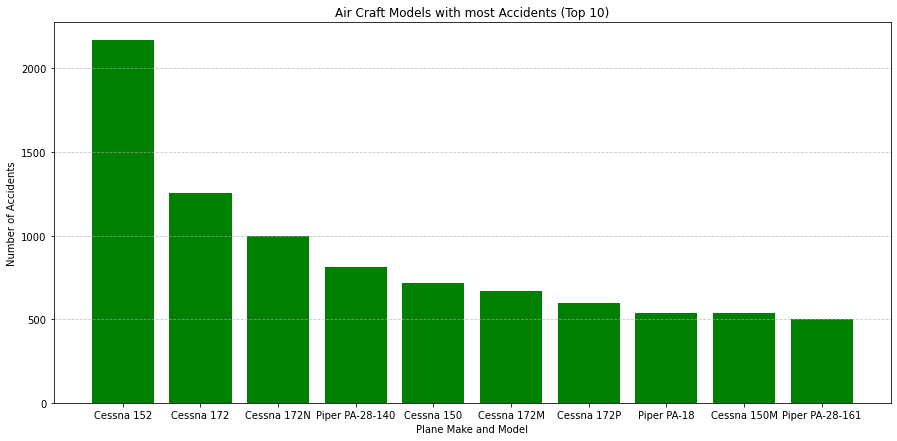

In [ ]:
#Create a new colimn with both make and model
makeModel['Make Model'] = makeModel['Make'] + " " + makeModel['Model']

plt.figure(figsize=(15,7))
plt.bar(makeModel['Make Model'],makeModel['No of Accidents'], color = 'green')
plt.xlabel('Plane Make and Model')
plt.ylabel('Number of Accidents')
plt.title('Air Craft Models with most Accidents (Top 10)')
plt.grid(axis='y', linestyle='--')
plt.show()


The graph above indicates **Cessna 152** has the most number of accidents.Also generally Cessna is seen to be a leading model with frequent accidents while Piper folows as the two are the ones dominating the top 10 category. 

### 6.2 No of Accidents considering the Phase Orientation

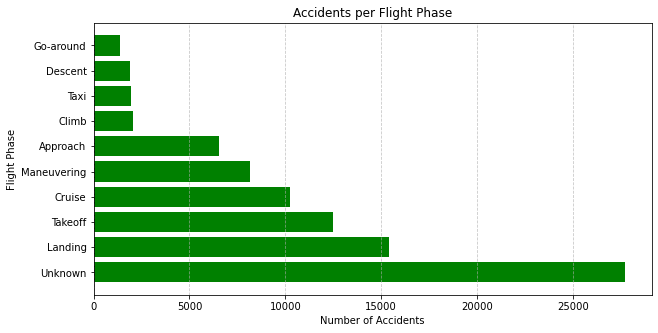

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(phase['Broad.phase.of.flight'], phase['No of Accidents'], color='green')
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.title('Accidents per Flight Phase')
plt.grid(axis='x', linestyle='--')
plt.show()

The graph shows most fights accidents occur during landing while others occurring maily are during takeoff and Cruise.

### 6.3 Accident count by some key plane features

In [63]:
# Grouping accident data by key aircraft features
accidentDetails = groups(df, ['Make', 'Model', 'Engine.Type', 'Number.of.Engines', 'Weather.Condition'])
topAcc= accidentDetails.sort_values(by='No of Accidents', ascending=False).head(10)
topAcc

,Make,Model,Engine.Type,Number.of.Engines,Weather.Condition,No of Accidents
7400,Cessna,152,Reciprocating,1.0,VMC,2092
7438,Cessna,172,Reciprocating,1.0,VMC,1179
7511,Cessna,172N,Reciprocating,1.0,VMC,910
18334,Piper,PA-28-140,Reciprocating,1.0,VMC,730
7353,Cessna,150,Reciprocating,1.0,VMC,693
7504,Cessna,172M,Reciprocating,1.0,VMC,612
7516,Cessna,172P,Reciprocating,1.0,VMC,554
7397,Cessna,150M,Reciprocating,1.0,VMC,519
18168,Piper,PA-18,Reciprocating,1.0,VMC,515
6329,CESSNA,172,Reciprocating,1.0,VMC,489


Grouping into most imporntant features we will need to look at it is evident that the `Make`,`Model`,`Engine.Type` and `Number.of.Engines` are major factors affecting and causing Aircraft accidents .When one checks the tail the craft models have larger bunber of engines and use Turbo engine types.

Let's plot the output of this analysis above:

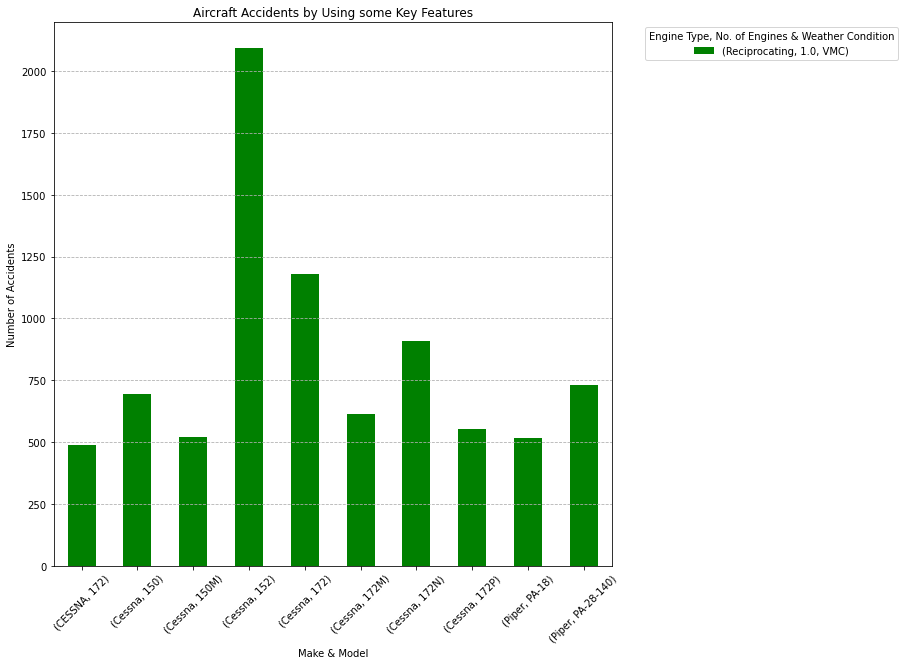

In [45]:
# Pivot data for stacked bar plot
piv = topAcc.pivot(index=['Make', 'Model'], columns=['Engine.Type', 'Number.of.Engines', 'Weather.Condition'], values='No of Accidents').fillna(0)
piv.plot(kind='bar', stacked=True, figsize=(10, 10),color = 'green')

plt.title("Aircraft Accidents by Using some Key Features")
plt.ylabel("Number of Accidents")
plt.xlabel("Make & Model")
plt.xticks(rotation=45)
plt.legend(title="Engine Type, No. of Engines & Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.show()


This is a clear indication that cessna152 has more frequest accidents and the two models have higher accident rates.

### 6.4 Fatal injuries per light purpose

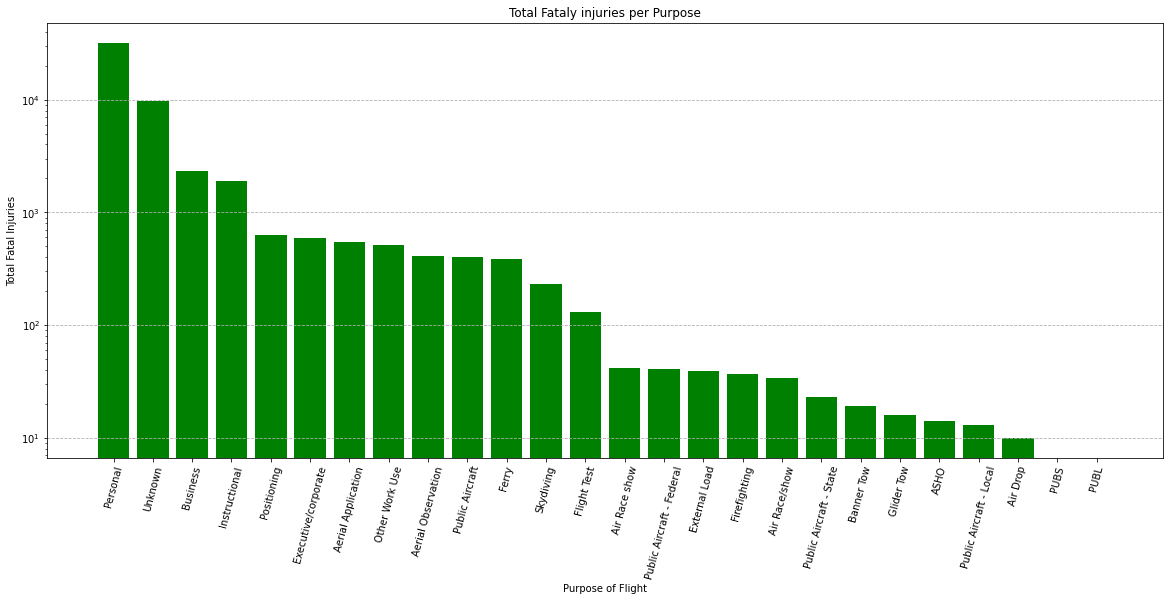

In [46]:
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries']).fillna(0)
fatalPurpose = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().reset_index()

# Sort from the highest
fatalPurpose = fatalPurpose.sort_values(by='Total.Fatal.Injuries', ascending=False)

plt.figure(figsize=(20 , 8))
plt.bar(fatalPurpose['Purpose.of.flight'], fatalPurpose['Total.Fatal.Injuries'], color='green')
plt.xticks(rotation=75)
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.yscale('log')  # Since some values are not visible we add this code to use the log scale to enlargen the display.
plt.title('Total Fataly injuries per Purpose')
plt.grid(axis='y', linestyle='--')
plt.show()


This graph indicates that Personal fights cause the most total Fatal Injuries.

### 6.5 Accidents by Number of Engines

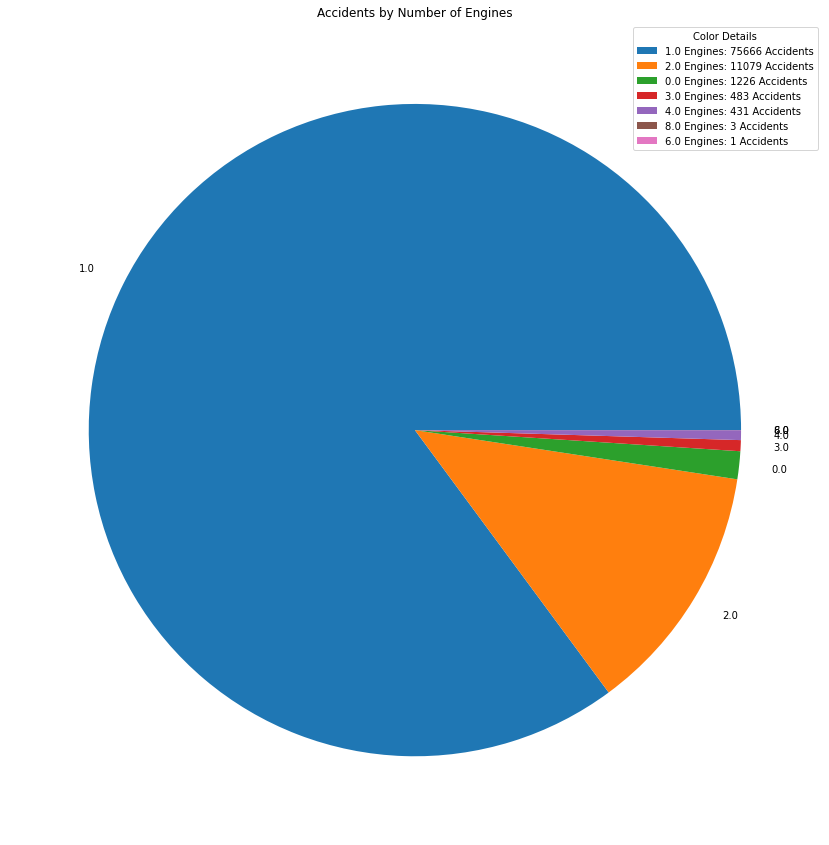

In [65]:
engineNo = df['Number.of.Engines'].value_counts()

plt.figure(figsize=(15, 15)) 
plt.pie(engineNo, labels=engineNo.index)

plt.legend(
           [f"{engines} Engines: {count} Accidents" for engines, count in zip(engineNo.index, engine_safety)],
           title="Color Details"
)
plt.title('Accidents by Number of Engines')
plt.show()

The pie chart indicates that most of the accident occuring are mainly with one engine. AirCarafts with Multi engines have less likelihood of accidents.

### 6.6 Total Accidents over Years

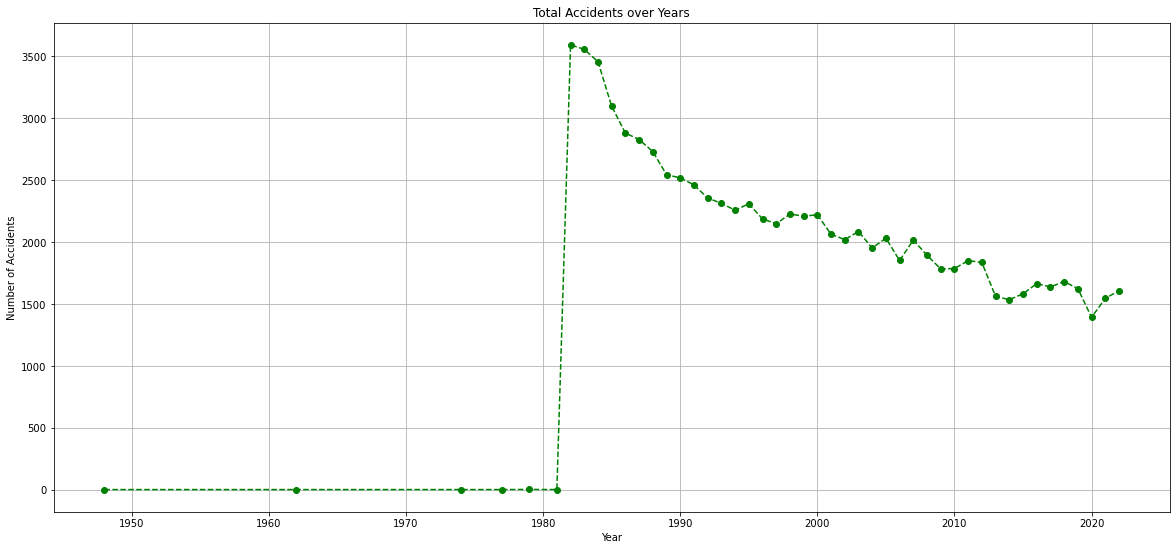

In [60]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
timeAcc = df.groupby(df['Event.Date'].dt.year).size().reset_index(name='No of Accidents')

plt.figure(figsize=(20,9))
plt.plot(timeAcc['Event.Date'], timeAcc['No of Accidents'], marker='o', linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Total Accidents over Years')
plt.grid(True)
plt.show()

The line graph shows the accident progress ove time it is likely that between 1950 and 1980s there were less olanes and a sudden spike of planes which was an introduction to the system lead to many accidents as most were testing but with time of more technology and improvementsimproving the Aircrafts hence a decrease in accidents as time go by.

# 7. Business Reccomeendations

1. **Prioritize multi-Engine Aircrafts** 

The analysis indicates that 85% of aircrafts with one engine are involved in accidents.This might be because one engine crafts are more susceptible to engine failures as they do not have any back up engines hence the Accidents.2 engines have 12.5% of accidents while 3-6 engines have about 2%engines.

2. **Prioritize commercial and Cargo filghts**

This conclusion comes in as the analysis shows that personal and instructural flights have higher total fatalities compared to commercial and cargo flights as they have relatively lower fatality cases assuming due to additional strict safety regulations and maintenance.

3. **Invest in aircaraft with strong safety records**

Beyond engines,I would recomend to check `Models` and `Makes` that have lesser accident casses for example cessna and Piper record top 10 accident cases ,I would reccomend other models and engine types with lesser Accident cases and those with safety Features.

# Conclusion
Based on accident trends:

    * Single engines pose a higher risk.

    * Twin and multi-engine have lower accident risks especially for commercial purpose.

    * Commercial and cargo aircrafts are safer to invest in rather than personal and instructural.

By incorporatibng these reccomendations the company can minimize risks, better safety measures and data driven decision making in aviation expansion investment of the company.

# 8. Saving cleaned data

In [64]:
df.to_csv("./Data/Cleaned_AviationData.csv")
print('Cleaned CSV file has been saved successfully.')

Cleaned CSV file has been saved successfully.
